In [1]:
x=1

In [2]:
import scanpy as sc
import pandas as pd
from pprint import pprint

## RNA

In [9]:
df1 = pd.read_csv('../pipeline/data/wandb/neurips_no_query_in_train_wandb_export_2024-10-25T20_34_11.499+02_00.csv')
df1['experiment'] = 'no_rna_in_ref'

In [10]:
df2 = pd.read_csv('../pipeline/data/wandb/neurips_query_in_train_wandb_export_2024-10-25T20_35_07.536+02_00.csv')
df2['experiment'] = 'rna_in_ref'

In [11]:
len(df1)

113

In [12]:
len(df2)

392

In [13]:
def pp(df):
    df = df[df['State'] == 'finished'].copy()
    df.loc[:, 'scib_pearson'] = df['Overall Score'] + df['test_pearson']
    df.loc[:, 'scib_spearman'] = df['Overall Score'] + df['test_spearman']
    df = df.dropna(subset=['scib_pearson', 'scib_spearman'])
    return df

In [14]:
def find_best(df):
    best_df = {}
    for mix in ['product', 'mixture']:
        for mix_type in ['Jeffreys', 'MMD']:
            
            df_ = df[(df['params.modality_alignment'] == mix_type) & (df['params.mix'] == mix)]
            print('============')
            print(f'best pearson + scib for {mix} and {mix_type}')
            df_ = df_.sort_values('scib_pearson')[[
                'Name',
                'scib_pearson',
                'params.integ',
                'params.kl',
                'params.lr',
                'params.mix',
                'params.modality_alignment',
                'test_pearson',
                'test_spearman',
                'Overall Score'
            ]]
            pprint(df_.iloc[-1, :])
            best_df[f'{mix}_{mix_type}'] = df_.iloc[-1, :][['test_pearson', 'test_spearman', 'Overall Score']]
    return best_df

In [15]:
df1 = pp(df1)
df2 = pp(df2)

In [16]:
best_df1 = find_best(df1)

best pearson + scib for product and Jeffreys
Name                         cite_no_rna_in_ref_c957e97b46
scib_pearson                                      1.440039
params.integ                                           0.1
params.kl                                          0.00001
params.lr                                            0.001
params.mix                                         product
params.modality_alignment                         Jeffreys
test_pearson                                      0.706269
test_spearman                                     0.592167
Overall Score                                     0.733769
Name: 22, dtype: object
best pearson + scib for product and MMD
Name                         cite_no_rna_in_ref_6c7f14a439
scib_pearson                                      1.418726
params.integ                                      100000.0
params.kl                                           0.0001
params.lr                                           0.0001
params

In [17]:
best_df2 = find_best(df2)

best pearson + scib for product and Jeffreys
Name                         cite_c2cbe51881
scib_pearson                        1.425479
params.integ                            0.01
params.kl                             0.0001
params.lr                             0.0001
params.mix                           product
params.modality_alignment           Jeffreys
test_pearson                        0.693931
test_spearman                       0.609239
Overall Score                       0.731548
Name: 4, dtype: object
best pearson + scib for product and MMD
Name                         cite_52efaa57aa
scib_pearson                        1.449711
params.integ                            10.0
params.kl                            0.00001
params.lr                             0.0001
params.mix                           product
params.modality_alignment                MMD
test_pearson                        0.727574
test_spearman                       0.606228
Overall Score                       0

In [18]:
# no rna in ref
# better prediction
best_df1_1 = pd.DataFrame(best_df1['product_MMD']).T
best_df1_2 = pd.DataFrame(best_df1['mixture_MMD']).T

In [19]:
best_df1_1['dataset'] = 'RNA'
best_df1_1['mix'] = 'product'
best_df1_1['q2r_type'] = 'no-query-in-train'

best_df1_2['dataset'] = 'RNA'
best_df1_2['mix'] = 'mixture'
best_df1_2['q2r_type'] = 'no-query-in-train'

In [20]:
# rna in ref
# better latent space
best_df2_1 = pd.DataFrame(best_df2['product_MMD']).T
best_df2_2 = pd.DataFrame(best_df2['mixture_MMD']).T

In [21]:
best_df2_1['dataset'] = 'RNA'
best_df2_1['mix'] = 'product'
best_df2_1['q2r_type'] = 'query-in-train'

best_df2_2['dataset'] = 'RNA'
best_df2_2['mix'] = 'mixture'
best_df2_2['q2r_type'] = 'query-in-train'

In [22]:
df_rna = pd.concat([best_df1_1, best_df1_2, best_df2_1, best_df2_2])
df_rna

,test_pearson,test_spearman,Overall Score,dataset,mix,q2r_type
7,0.734073,0.627828,0.684653,RNA,product,no-query-in-train
14,0.723437,0.627781,0.714955,RNA,mixture,no-query-in-train
0,0.727574,0.606228,0.722137,RNA,product,query-in-train
35,0.660352,0.56392,0.696791,RNA,mixture,query-in-train


## MSI

In [23]:
df1 = pd.read_csv('../pipeline/data/wandb/msi_no_query_in_train_wandb_export_2024-10-25T20_35_54.805+02_00.csv')
df1['experiment'] = 'no_rna_in_ref'

In [24]:
df2 = pd.read_csv('../pipeline/data/wandb/msi_query_in_train_wandb_export_2024-10-25T20_36_47.047+02_00.csv')
df2['experiment'] = 'rna_in_ref'

In [25]:
len(df1)

1000

In [26]:
len(df2)

1000

In [27]:
df1 = pp(df1)
df2 = pp(df2)

In [28]:
df1.loc[df1['Name'] == 'msi_no_rna_in_ref_05c62da844_epoch=149-step=1500', :].T

,792
Name,msi_no_rna_in_ref_05c62da844_epoch=149-step=1500
State,finished
Notes,-
User,NaN
Tags,NaN
Created,2024-10-20T12:31:44.000Z
Runtime,24
Sweep,NaN
adata1,AnnData object with n_obs × n_vars = 5618 × 20...
adata2,AnnData object with n_obs × n_vars = 5618 × 50...


In [29]:
best_df1 = find_best(df1)

best pearson + scib for product and Jeffreys
Name                         msi_no_rna_in_ref_cd05bc5541_epoch=199-step=2000
scib_pearson                                                         1.654883
params.integ                                                              1.0
params.kl                                                              0.0001
params.lr                                                               0.001
params.mix                                                            product
params.modality_alignment                                            Jeffreys
test_pearson                                                         0.945328
test_spearman                                                        0.870683
Overall Score                                                        0.709555
Name: 65, dtype: object
best pearson + scib for product and MMD
Name                         msi_no_rna_in_ref_05c62da844_epoch=149-step=1500
scib_pearson                     

In [30]:
df2.loc[df2['Name'] == '70a17df9e2_epoch=149-step=2850', :].T

,439
Name,70a17df9e2_epoch=149-step=2850
test_mse,0.106626
test_pearson,0.942311
test_r2_score,-0.056235
test_spearman,0.865033
Overall Score,0.680837
State,finished
Notes,-
User,NaN
Tags,NaN


In [31]:
best_df2 = find_best(df2)

best pearson + scib for product and Jeffreys
Name                         a2e5a9f0a3_epoch=249-step=4750
scib_pearson                                       1.662502
params.integ                                            0.1
params.kl                                            0.0001
params.lr                                             0.001
params.mix                                          product
params.modality_alignment                          Jeffreys
test_pearson                                       0.942185
test_spearman                                      0.863282
Overall Score                                      0.720317
Name: 472, dtype: object
best pearson + scib for product and MMD
Name                         70a17df9e2_epoch=149-step=2850
scib_pearson                                       1.623148
params.integ                                         1000.0
params.kl                                            0.0001
params.lr                                         

In [32]:
# no rna in ref
# better prediction
best_df1_1 = pd.DataFrame(best_df1['product_MMD']).T
best_df1_2 = pd.DataFrame(best_df1['mixture_MMD']).T

In [33]:
best_df1_1['dataset'] = 'MSI'
best_df1_1['mix'] = 'product'
best_df1_1['q2r_type'] = 'no-query-in-train'

best_df1_2['dataset'] = 'MSI'
best_df1_2['mix'] = 'mixture'
best_df1_2['q2r_type'] = 'no-query-in-train'

In [34]:
# rna in ref
# better latent space
best_df2_1 = pd.DataFrame(best_df2['product_MMD']).T
best_df2_2 = pd.DataFrame(best_df2['mixture_MMD']).T

In [35]:
best_df2_1['dataset'] = 'MSI'
best_df2_1['mix'] = 'product'
best_df2_1['q2r_type'] = 'query-in-train'

best_df2_2['dataset'] = 'MSI'
best_df2_2['mix'] = 'mixture'
best_df2_2['q2r_type'] = 'query-in-train'

In [36]:
df_msi = pd.concat([best_df1_1, best_df1_2, best_df2_1, best_df2_2])
df_msi

,test_pearson,test_spearman,Overall Score,dataset,mix,q2r_type
792,0.941971,0.863909,0.667807,MSI,product,no-query-in-train
283,0.943279,0.866245,0.640572,MSI,mixture,no-query-in-train
439,0.942311,0.865033,0.680837,MSI,product,query-in-train
316,0.942991,0.863044,0.660386,MSI,mixture,query-in-train


In [37]:
df = pd.concat([df_rna, df_msi])
df

,test_pearson,test_spearman,Overall Score,dataset,mix,q2r_type
7,0.734073,0.627828,0.684653,RNA,product,no-query-in-train
14,0.723437,0.627781,0.714955,RNA,mixture,no-query-in-train
0,0.727574,0.606228,0.722137,RNA,product,query-in-train
35,0.660352,0.56392,0.696791,RNA,mixture,query-in-train
792,0.941971,0.863909,0.667807,MSI,product,no-query-in-train
283,0.943279,0.866245,0.640572,MSI,mixture,no-query-in-train
439,0.942311,0.865033,0.680837,MSI,product,query-in-train
316,0.942991,0.863044,0.660386,MSI,mixture,query-in-train


## plot

In [38]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [39]:
df_full = df.copy()

In [40]:
df_full

,test_pearson,test_spearman,Overall Score,dataset,mix,q2r_type
7,0.734073,0.627828,0.684653,RNA,product,no-query-in-train
14,0.723437,0.627781,0.714955,RNA,mixture,no-query-in-train
0,0.727574,0.606228,0.722137,RNA,product,query-in-train
35,0.660352,0.56392,0.696791,RNA,mixture,query-in-train
792,0.941971,0.863909,0.667807,MSI,product,no-query-in-train
283,0.943279,0.866245,0.640572,MSI,mixture,no-query-in-train
439,0.942311,0.865033,0.680837,MSI,product,query-in-train
316,0.942991,0.863044,0.660386,MSI,mixture,query-in-train


In [41]:
score_type = 'test_pearson'

In [46]:
def plot(df_full, score_type):
    df = df_full[[score_type, 'dataset', 'mix', 'q2r_type']]
    df = df.rename(columns={score_type: 'score'})

    # Unique values for the categories
    datasets = df['dataset'].unique()
    q2r_types = df['q2r_type'].unique()
    mix_types = df['mix'].unique()
    
    # Define bar widths and spacing
    bar_width = 0.1
    q2r_gap = 0.05   # Gap between TypeA and TypeB within each dataset
    dataset_gap = 0.25  # Larger gap between datasets
    
    # Prepare x positions
    x_positions = []
    x_labels_pos = []
    
    for i, dataset in enumerate(datasets):
        base = i * (2 * len(q2r_types) * bar_width + dataset_gap)  # Larger gap between datasets
        x_labels_pos.append(base + (len(q2r_types) * len(mix_types) * bar_width + q2r_gap) / 2)  # Center label for each dataset
        for j, q2r_type in enumerate(q2r_types):
            x_base = base + j * (len(mix_types) * bar_width + q2r_gap)  # Add q2r_gap between TypeA and TypeB
            x_positions.append(x_base)
    
    colors = plt.cm.Paired([1, 0, 5, 4])
    
    fig, ax = plt.subplots(figsize=(10, 6))

    # Enable grid behind the bars
    ax.grid(True, which='both', axis='y', linestyle='--', linewidth=0.5, color='gray', zorder=0)
    ax.set_axisbelow(True)  # Ensures grid is behind the bars
    
    # Plot bars
    for i, dataset in enumerate(datasets):
        for j, q2r_type in enumerate(q2r_types):
            subset = df[(df['dataset'] == dataset) & (df['q2r_type'] == q2r_type)]
            for k, mix in enumerate(mix_types):
                bar_x = x_positions[2 * i + j] + k * bar_width
                score = subset[subset['mix'] == mix]['score'].values[0]
                color_index = j * len(mix_types) + k  # Select color based on q2r_type and mix
                ax.bar(bar_x, score, width=bar_width, label=f"{q2r_type}-{mix}" if i == 0 else "", color=colors[color_index], )
    
    # Set x-axis ticks and labels
    ax.set_xticks(x_labels_pos)
    ax.set_xticklabels(datasets)
    
    # ax.set_ylim((0,1.05))
    
    # Legend and labels
    ax.legend(loc='upper left', bbox_to_anchor=(1, 1), title="Mix and Type")
    ax.set_xlabel("Dataset")
    ax.set_ylabel("Score")
    ax.set_title("Bar plot with Dataset and q2r_type groups with internal spacing")
    
    plt.savefig(f'./figures/{score_type}.svg', bbox_inches='tight')
    plt.show()


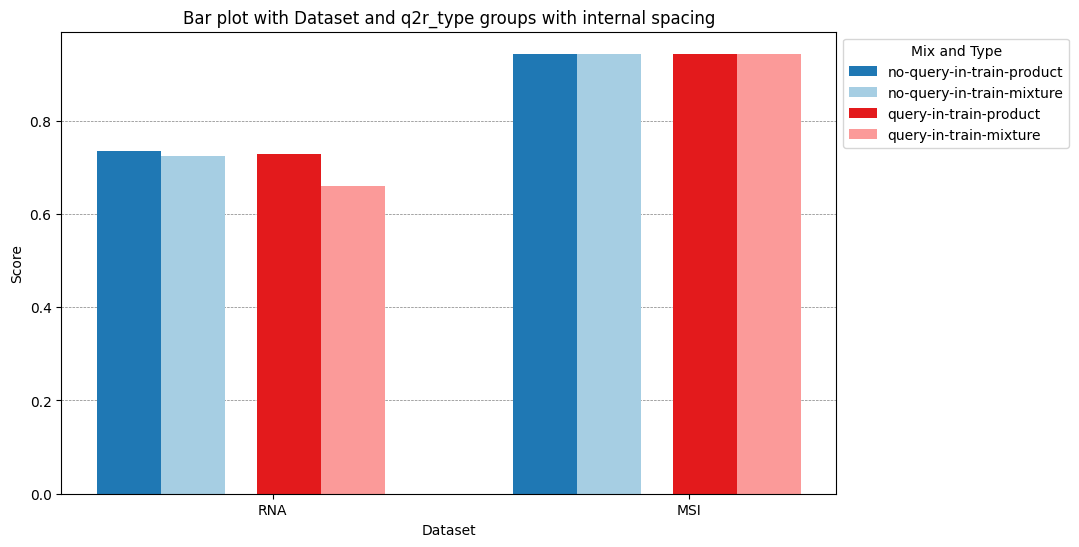

In [47]:
plot(df_full, 'test_pearson')

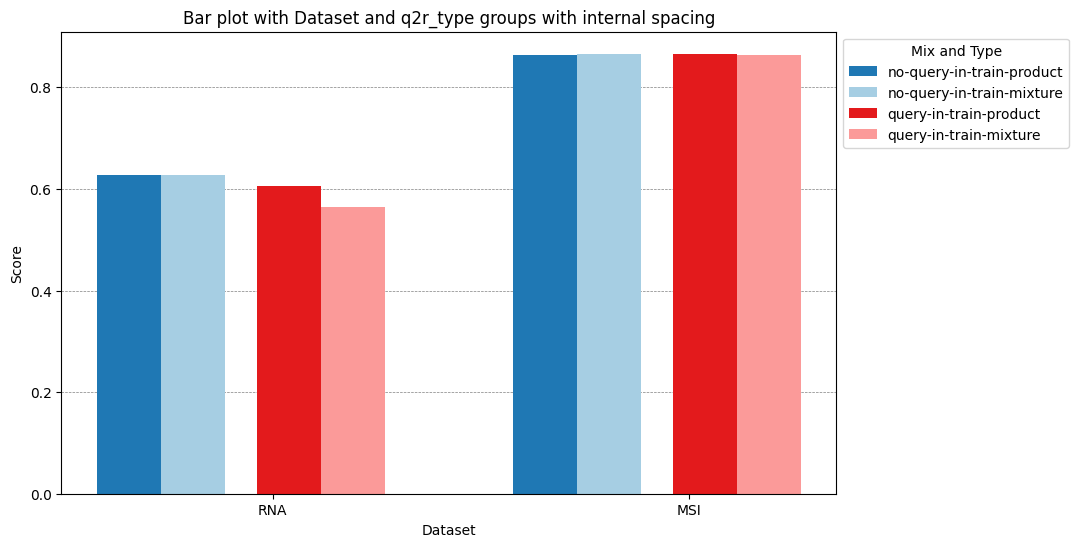

In [48]:
plot(df_full, 'test_spearman')

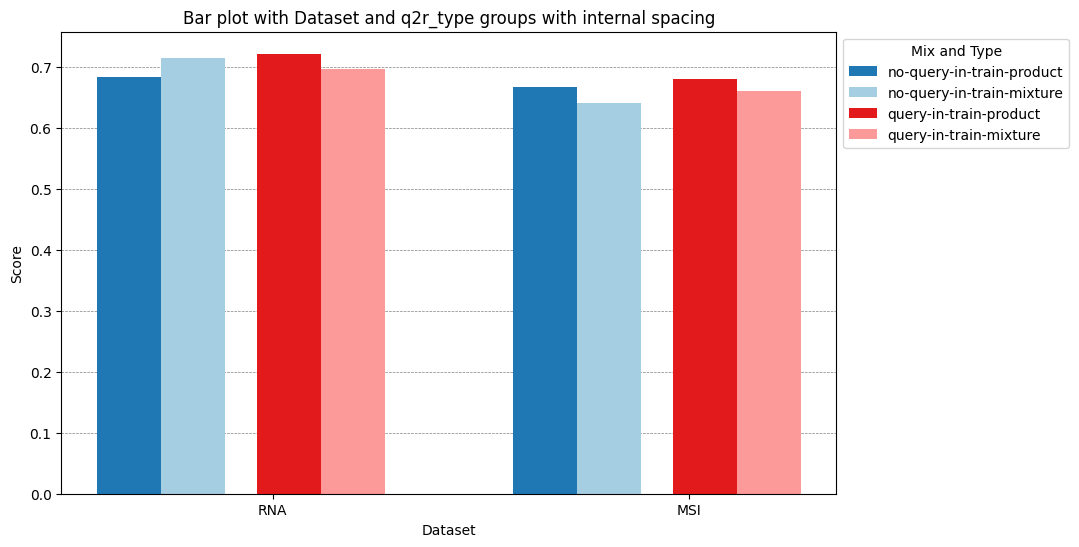

In [49]:
plot(df_full, 'Overall Score')